<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Transfer_Learning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning - Fine Tuning


## Helper Functions

In [8]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-05 08:35:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-05 08:36:00 (104 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [9]:
## Import helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Get Data

Im going to use keras.applications for the models

In [12]:
# Get 10 % of training data\
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-09-05 08:38:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  33.7MB/s    in 4.8s    

2022-09-05 08:38:31 (33.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [13]:
unzip_data('10_food_classes_10_percent.zip')

In [14]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [15]:
# Create training and test dir paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [16]:
import tensorflow as tf


In [17]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [24]:
#for images, labels in train_data_10_percent.take(1):
  #print(images,labels)

## Build the model using KERAS FUNCTIONAL API

# Model 0: Transfer Learning model using Keras Functional API

In [29]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (the pre trained weights will be freezed)
base_model.trainable = False

# 3. Create the input
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
# 4. If using a model like ResNet50V2 need to normalize inputs (not on EfficientNet's beacause its already have a rescaling layer)
# x = tf.keras.layers.exprimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing input: {x.shape}")

# 6. Average Pool the outputs (aggreagte all the most important information)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_layer')(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the ouput activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. Combine inputs with the ouputs
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())

# 10. Fit the model
history_0 = model_0.fit(train_data_10_percent, batch_size=BATCH_SIZE, epochs=5, steps_per_epoch=len(train_data_10_percent), validation_data=test_data, validation_steps=len(test_data), callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_feature_extraction")])

Shape after passing input: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220905-095006
Epoch 1/5
24/24 [==============================] - 14s 376ms/step - loss: 1.9223 - accuracy: 0.3787 - val_loss: 1.3896 - val_accuracy: 0.6860
Epoch 2/5
24/24 [==============================] - 8s 318ms/step - loss: 1.1615 - accuracy: 0.7440 - val_loss: 0.9467 - val_accuracy: 0.7960
Epoch 3/5
24/24 [==============================] - 9s 356ms/step - loss: 0.8430 - accuracy: 0.8093 - val_loss: 0.7639 - val_accuracy: 0.8280
Epoch 4/5
24/24 [==============================] - 8s 329ms/step - loss: 0.6948 - accuracy: 0.8320 - val_loss: 0.6737 - val_accuracy: 0.8372
Epoch 5/5
24/24 [==============================] - 9s 358ms/step - loss: 0.5943 - accuracy: 0.8613 - val_loss: 0.6161 - val_accuracy: 0.8408


In [30]:
# Evalute
model_0.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.6161 - accuracy: 0.8408


[0.6160797476768494, 0.8407999873161316]

In [32]:
# Check the layers in our model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_4
1 rescaling_3
2 normalization_3
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [33]:
# Base model summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_3 (Normalization  (None, None, None,   7          ['rescaling_3[0][0]']            
 )                              3)                                                   

In [34]:
# Summary of whole model
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_layer (Globa  (None, 1280)             0         
 lAveragePooling2D)                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


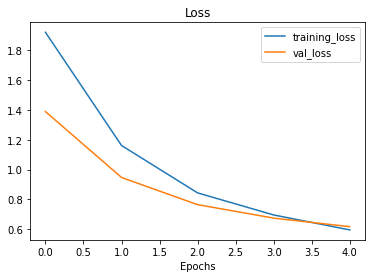

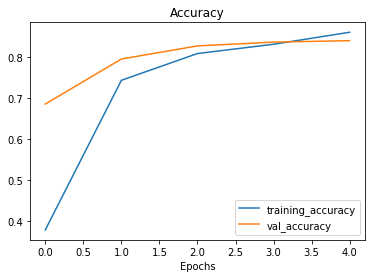

In [35]:
plot_loss_curves(history_0)